# Breast Cancer Classification

## Introduction

This notebook presents a comprehensive analysis aimed at determining whether breast cancer is benign or malignant using the Breast Cancer Wisconsin (Diagnostic) Data Set. The process involves several crucial steps, each designed to build a robust and accurate classification model. 

## Workflow

### 1. Data Wrangling
We start by cleaning and preparing the dataset for analysis. This step includes handling missing values, normalizing data, and converting categorical variables into numerical formats suitable for machine learning algorithms.

### 2. Exploratory Data Analysis (EDA)
In this phase, we perform a detailed examination of the dataset to uncover underlying patterns and relationships. This includes:
- **SQL Queries:** Using SQL to manipulate and query the dataset for specific insights.
- **Data Visualization:** Creating plots and charts to visualize distributions, correlations, and other significant patterns.



### 3. Model Building
We apply multiple classification algorithms to the dataset to predict whether the cancer is benign or malignant. The models we explore include:
- **Logistic Regression**
- **Decision Trees**
- **Support Vector Machines (SVM)**
- **K-Nearest Neighbors (KNN)**


### 4. Model Evaluation
To assess the performance of our models, we use various metrics such as:
- **Accuracy**
- **Jaccard_Score**
- **F1 Score**


## Database Information:

1. **ID number**
2. **Diagnosis** (M = malignant, B = benign)
3. **Ten real-valued features are computed for each cell nucleus:**
    - a) **radius** (mean of distances from center to points on the perimeter)
    - b) **texture** (standard deviation of gray-scale values)
    - c) **perimeter**
    - d) **area**
    - e) **smoothness** (local variation in radius lengths)
    - f) **compactness** (perimeter^2 / area - 1.0)
    - g) **concavity** (severity of concave portions of the contour)
    - h) **concave points** (number of concave portions of the contour)
    - i) **symmetry**
    - j) **fractal dimension** ("coastline approximation" - 1)

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1. Data Wrangling

**Let's check the type of each column :**

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Identify and calculate the percentage of missing values in each attribute :**

In [8]:
df.isnull().sum()/len(df)*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

**Since data is clean let's create a new column to represent the classification variable for the diagnosis. If the value is zero, it indicates the cancer is benign; if the value is one, it indicates the cancer is malignant.**

In [6]:
N_Diagnosis=[]
for v in df['diagnosis']:
    if v == 'B':
        N_Diagnosis.append(0)
    else:
        N_Diagnosis.append(1)

df['N_Diagnosis']=N_Diagnosis
df[['diagnosis','N_Diagnosis']].tail(10)

,diagnosis,N_Diagnosis
559,B,0
560,B,0
561,B,0
562,M,1
563,M,1
564,M,1
565,M,1
566,M,1
567,M,1
568,B,0


## 2. Exploratory Data Analysis (EDA)

### 2-1 SQL queries :

**Using SQL queries for data exploration and analysis is a powerful approach to gain insights from the dataset.**

In [21]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [22]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [23]:
%sql sqlite:///my_data1.db

In [24]:
df1=df.to_sql("CANCERTBL", con, if_exists='replace', index=False,method="multi")

**Count of records :**

In [30]:
%sql select count(*) as records from CANCERTBL

 * sqlite:///my_data1.db
Done.


records
569


**Count of Benign vs Malignant Cases :**

In [32]:
%sql select diagnosis, count(*) as count from CANCERTBL group by diagnosis

 * sqlite:///my_data1.db
Done.


diagnosis,count
B,357
M,212


**Average features by Diagnosis :**

In [36]:
%%sql select diagnosis,
             radius_mean, 
             texture_mean, 
             perimeter_mean,
             area_mean,
             smoothness_mean,
             compactness_mean,
             concavity_mean,
             "concave points_mean",
             symmetry_mean,
             fractal_dimension_mean
             from CANCERTBL group by diagnosis

 * sqlite:///my_data1.db
Done.


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871


**Average SE Features by Diagnosis :**

In [45]:
%%sql SELECT diagnosis,
       radius_se, 
       texture_se, 
       perimeter_se,
       area_se,
       smoothness_se,
       compactness_se,
       concavity_se,
       "concave points_se",
       symmetry_se,
       fractal_dimension_se
FROM CANCERTBL group by diagnosis


 * sqlite:///my_data1.db
Done.


diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
B,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023
M,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193


**Average Worst Features by Diagnosis :**

In [46]:
%%sql SELECT diagnosis,
       radius_worst, 
       texture_worst, 
       perimeter_worst,
       area_worst,
       smoothness_worst,
       compactness_worst,
       concavity_worst,
       "concave points_worst",
       symmetry_worst,
       fractal_dimension_worst
FROM CANCERTBL group by diagnosis


 * sqlite:///my_data1.db
Done.


diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
B,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
M,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


### 2-2 Data visualization :

**Visualizations are crucial for EDA as they provide an intuitive understanding of the data, we will use Heatmaps to identify the correlation between the target variable and other features.**

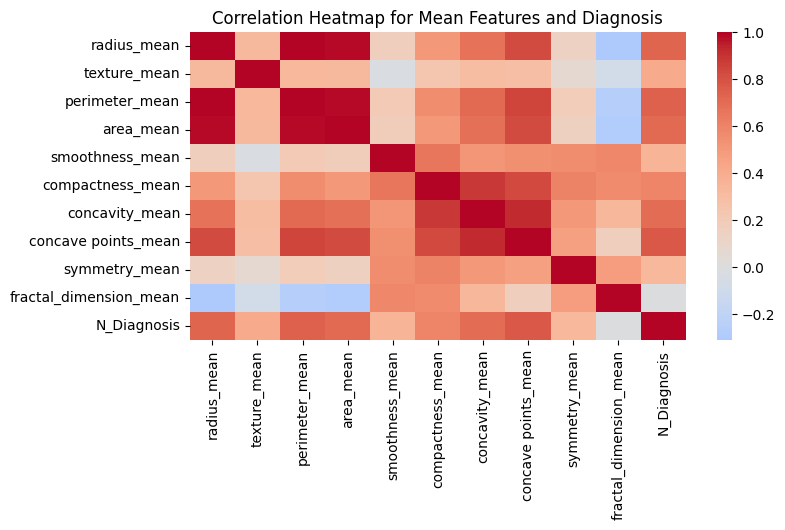

In [69]:
# Select only '_mean' features and 'diagnosis'
mean_columns = [col for col in df.columns if '_mean' in col]
mean_columns.append('N_Diagnosis')

# Compute correlation matrix for mean features and diagnosis
correlation_matrix = df[mean_columns].corr()

# Plot heatmap without numbers
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Mean Features and Diagnosis')
plt.show()

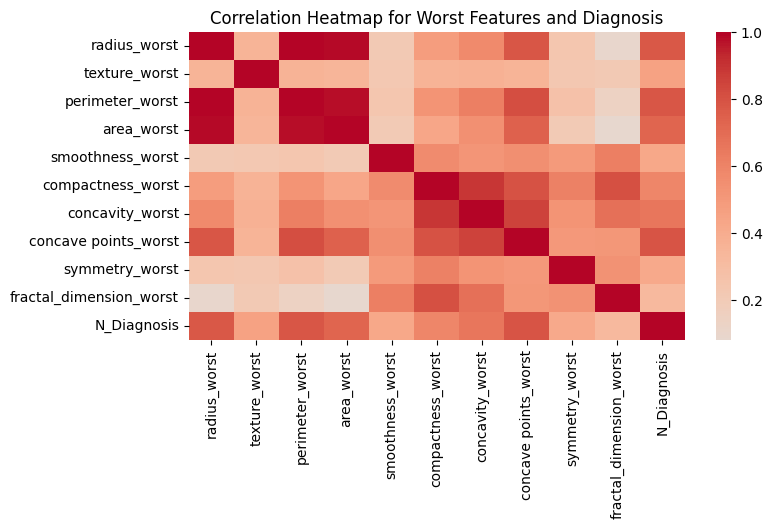

In [70]:
# Select only '_worst' features and 'diagnosis'
worst_columns = [col for col in df.columns if '_worst' in col]
worst_columns.append('N_Diagnosis')

# Compute correlation matrix for mean features and diagnosis
correlation_matrix = df[worst_columns].corr()

# Plot heatmap without numbers
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Worst Features and Diagnosis')
plt.show()